## Methode du simplex

low & high  0 1
low & high  1 0
low & high  1 2
low & high  1 0
low & high  1 0
low & high  0 2
low & high  0 1
low & high  1 2
low & high  1 0
low & high  0 2
low & high  2 1
low & high  1 0
low & high  1 2
low & high  1 0
low & high  0 2
low & high  2 1
low & high  1 0
low & high  1 2
low & high  1 2
low & high  2 0
low & high  0 1
low & high  0 2
low & high  2 1
low & high  1 0
low & high  1 0
low & high  0 2
low & high  2 1
low & high  2 0
low & high  0 1
res = [0.99979197 2.00022196]
29
 final_simplex: (array([[1.00000026, 2.0000003 ],
       [1.00000054, 1.99999948],
       [0.99999928, 2.00000046]]), array([1.53191057e-13, 5.64598718e-13, 7.24760574e-13]))
           fun: 1.5319105726609948e-13
       message: 'Optimization terminated successfully.'
          nfev: 148
           nit: 76
        status: 0
       success: True
             x: array([1.00000026, 2.0000003 ])


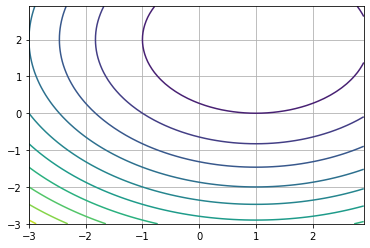

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize

def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

def simplex(P):
# P est un tableau où chaque ligne donne les coordonnées d'un point    
    NPT=P.shape[0]

    alpha=1
    beta =0.5
    gamma=2
    eps=1e-6
    niter=0
    while True:
        niter=niter+1
        fp=np.zeros(NPT)  # equiv a np.zeros(shape=(NPT))
        for npt in range(NPT):
            fp[npt]=f(P[npt, :])  
  
        high=fp.argmax()
        low =fp.argmin()

        print('low & high ', low, high)

        mask = np.ones(fp.shape[0], dtype=bool)
        mask[high] = False
        fq=fp[mask]
        Q =P [mask]
        Pbary=Q.mean(axis=0)
        
 # A COMPLETER       
        d=np.sum((P-Pbary)**2)
        if d<eps:
            return Pbary, niter

        Phigh=P[high, :]
        Yhigh=f(Phigh)
        Plow =P[low, :]
        Ylow=f(Plow)

        Prefl=(1+alpha)*Pbary-alpha*Phigh
        Yrefl=f(Prefl)
        if Yrefl>Ylow and Yrefl<Yhigh:
            P[high, :]=Prefl
        elif Yrefl<Ylow:
            Pexpa=(1+gamma)*Pbary-gamma*Phigh
            Yexpa=f(Pexpa)
            if Yexpa<Ylow:
                P[high, :]=Pexpa
            else:
                P[high, :]=Prefl
        else:
            Pcont=(1-beta)*Pbary+beta*Phigh
            Ycont=f(Pcont)
            if Ycont>Yhigh:
                mask = np.ones(fp.shape[0], dtype=bool)
                mask[low] = False
                P[mask] = 0.5*(P[mask] +Plow) # npt != low

#                for npt in range(NPT):
#                    if npt!=low: 
#                        P[npt, :]=0.5*(P[npt, :]+Plow)
            else:
                P[high, :]=Pcont

            
P=np.array([[2, 0], [3, 0], [3, 1]], dtype='float')
Pbary, niter=simplex(P)
print('res =', Pbary)
print(niter)

delta =0.1
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z=(X-1)**2+(Y-2)**2

plt.figure()
CS = plt.contour(X, Y, Z, 11)                        # add 11 contour lines  
plt.grid()

res = optimize.minimize(fun=f, x0=(2, 0), method='Nelder-Mead', tol=1e-6)
print(res)
 
#res = optimize.minimize(f, (2, 0), method='CG')
#print(res)

plt.show()

In [ ]:
np.zeros(2)

In [ ]:
np.zeros(shape=(2))

In [ ]:
P=np.array([[2, 0], [3, 0], [3, 1]], dtype='float')

In [ ]:
P